In [8]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import load_from_disk
import json

# 결과 값 분석 - Valid

In [69]:
def find_ans(txt):
    return txt['text'][0]
def valid_result(dataset_path, pred_path, print_result, return_result):
    dataset = load_from_disk(dataset_path)
    valid_dataset = dataset["validation"]
    valid_df=pd.DataFrame(valid_dataset)
    valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
    valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
    valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

    valid_df['answer_text'] = valid_df["answers"].apply(find_ans)

    with open(pred_path) as f:
        prediction = json.load(f)
    pred_id = []
    pred_ans = []
    for k,v in enumerate(prediction):
        pred_id.append(v)
        pred_ans.append(prediction[v])
    pred_df = pd.DataFrame({'id': pred_id, 'pred_ans': pred_ans})

    valid_pred_df = pd.merge(valid_df, pred_df, on='id')
    valid_pred_df = valid_pred_df[['title','context','question','answer_text','pred_ans','con_len','qu_len','ans_len']]
    corect_df = valid_pred_df.loc[valid_pred_df['answer_text']==valid_pred_df['pred_ans']]
    incorect_df = valid_pred_df.loc[valid_pred_df['answer_text']!=valid_pred_df['pred_ans']]
    
    if print_result:
        plt.figure(figsize=(10, 5))
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

        plt.subplot(3,2,1)
        plt.plot(sorted(corect_df["con_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Context Data")

        plt.subplot(3,2,2)
        plt.plot(sorted(incorect_df["con_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Context Data")

        plt.subplot(3,2,3)
        plt.plot(sorted(corect_df["qu_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Question Data")

        plt.subplot(3,2,4)
        plt.plot(sorted(incorect_df["qu_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Question Data")

        plt.subplot(3,2,5)
        plt.plot(sorted(corect_df["ans_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Answer Data")

        plt.subplot(3,2,6)
        plt.plot(sorted(incorect_df["ans_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Answer Data")

        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

        plt.subplot(3,2,1)
        plt.hist(sorted(corect_df["con_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Context Data")

        plt.subplot(3,2,2)
        plt.hist(sorted(incorect_df["con_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Context Data")

        plt.subplot(3,2,3)
        plt.hist(sorted(corect_df["qu_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Question Data")

        plt.subplot(3,2,4)
        plt.hist(sorted(incorect_df["qu_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Question Data")

        plt.subplot(3,2,5)
        plt.hist(sorted(corect_df["ans_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Answer Data")

        plt.subplot(3,2,6)
        plt.hist(sorted(incorect_df["ans_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Answer Data")
        
        plt.show()
        
        print('맞춘 개수: ', len(valid_pred_df)-len(incorect_df))
        print(corect_df[["con_len","qu_len","ans_len"]].describe())
        print('틀린 개수: ', len(incorect_df))
        print(incorect_df[["con_len","qu_len","ans_len"]].describe())
    if return_result:
        return corect_df, incorect_df

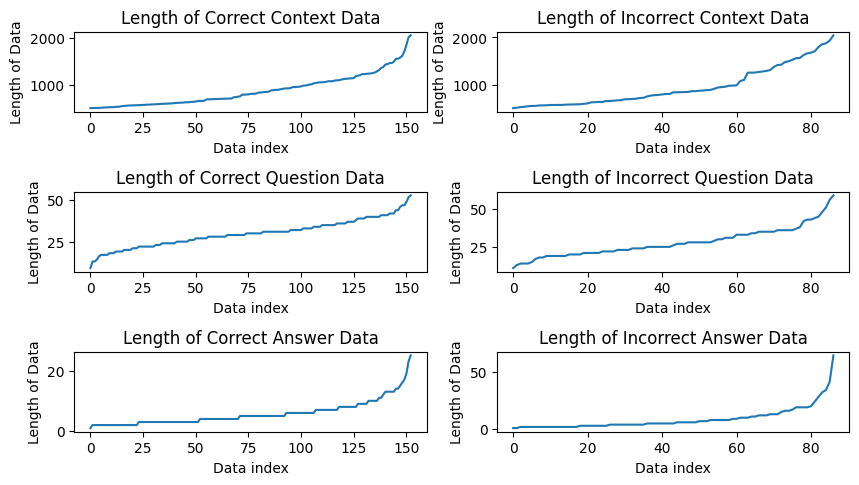

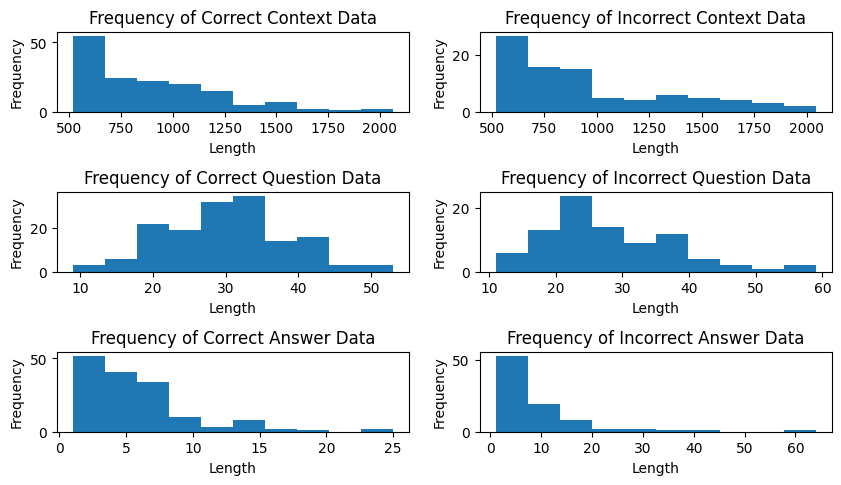

맞춘 개수:  153
           con_len      qu_len     ans_len
count   153.000000  153.000000  153.000000
mean    892.679739   29.915033    5.803922
std     330.983516    8.197358    4.041005
min     517.000000    9.000000    1.000000
25%     616.000000   24.000000    3.000000
50%     820.000000   30.000000    5.000000
75%    1089.000000   35.000000    7.000000
max    2064.000000   53.000000   25.000000
틀린 개수:  87
           con_len     qu_len    ans_len
count    87.000000  87.000000  87.000000
mean    959.011494  27.931034   8.862069
std     404.685996   9.508617   9.789853
min     518.000000  11.000000   1.000000
25%     640.500000  21.000000   3.000000
50%     848.000000  26.000000   5.000000
75%    1262.500000  34.000000  11.000000
max    2043.000000  59.000000  64.000000


In [70]:
corect_df, incorect_df = valid_result(dataset_path="/opt/ml/input/data/train_dataset",
                                      pred_path = "/opt/ml/input/code/outputs/train_dataset/predictions.json", 
                                      print_result=True, return_result=True)

In [57]:
corect_df

,title,context,question,answer_text,pred_ans,con_len,qu_len,ans_len
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,한보철강,한보철강,625,30,4
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,1871년,1871년,964,36,5
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,나뭇잎,나뭇잎,611,31,3
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,금대야,금대야,1391,24,3
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,코칭 스티치,코칭 스티치,597,32,6
...,...,...,...,...,...,...,...,...
230,스위스 근위대,이들 스위스 용병들은 동성애자 사제들에게 성추행에 시달리기도 한다. 바티칸의 경비를...,성직자들의 실체에 대해 말한 용병의 기사는 누가 작성하였나요?,슈바이츠 암 존탁,슈바이츠 암 존탁,848,34,9
232,트리부스 민회,트리부스 민회(Comitia Tributa)는 로마 공화국 사회에서 행정과 관련된 ...,1표로 간주하기 위한 의견 수렴 방식은?,다수결,다수결,670,22,3
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,제 양왕,제 양왕,1254,36,4
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,'일곱 개의 신전 광장','일곱 개의 신전 광장',897,26,13


In [61]:
incorect_df

,title,context,question,answer_text,pred_ans,con_len,qu_len,ans_len
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,수평적 관계,위계 서열적 관계,608,34,6
5,마쓰에 소요 사건,마쓰에 소요 사건(마쓰에소조지켄)은 1945년 8월 24일 일본 제국 시마네현의 현...,1945년 쇼와천황의 항복 선언이 발표된 라디오 방송은?,옥음방송,쇼와 천황의 옥음방송,1284,31,4
16,아리크부카,"보르지긴 아리크부카( , 孛兒只斤 阿里不哥|패아지근 아리불가, 1219년 ~ 126...",몽케가 죽은 뒤 쿠릴타이에서 대칸의 지위를 얻은 사람의 이름은?,아리크 부케,쿠빌라이,873,35,6
18,이이노야성,"헤이안 시대 말기, 이이 가 초대 당주 이이 도모야스에 의해 축성되었다고 전해진다 ...","남북조 시대에서 이이 씨가 전쟁이 발생했을 때, 생활했던 장소는?",미타케성,이이노야 성,1711,36,4
19,신재영 (야구 선수),대전유천초등학교에서 야구를 시작할 당시에는 내야수였다. 한밭중학교 3학년 때 연습 ...,박지훈은 1라운드에서 몇 순위를 차지했는가?,전체 4순위,4순위,583,24,6
...,...,...,...,...,...,...,...,...
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,퀘이커 교도였던 앨리스 페어살 스미스,앨리스 페어살 스미스,667,33,20
233,미헤소케어족,"과거에 미헤소케어족은 지금보다 훨씬 넓은, 과테말라 태평양 연안(소코누스코 지역)에...",데이비드 스튜어트는 누구의 해독방법을 다른 지협 문자 자료에 적용해보았나요?,코프먼과 저스티슨,코프먼,763,42,9
234,인사고과,인사고과는 조직내의 각종 직무에 종사하고 있는 종업원의 근무성적이나 능력 등을 그 ...,인적 성과와 더불어 기업의 성과를 평가하는 요소는?,물적 성과(物的成果),물적 성과,805,28,11
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,미나미 지로 총독,1314,27,6


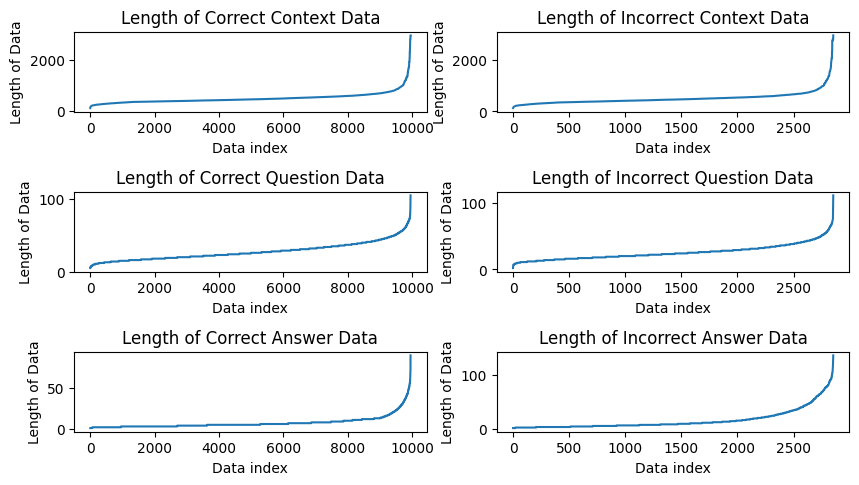

맞춘 개수:  9951
           con_len       qu_len      ans_len
count  9951.000000  9951.000000  9951.000000
mean    494.444779    27.769772     7.560245
std     220.616807    11.912637     7.523041
min     110.000000     5.000000     1.000000
25%     379.000000    19.000000     3.000000
50%     449.000000    25.000000     5.000000
75%     552.000000    34.000000     8.000000
max    2946.000000   105.000000    90.000000
틀린 개수:  2855
           con_len       qu_len      ans_len
count  2855.000000  2855.000000  2855.000000
mean    507.334851    25.622417    15.728546
std     249.663229    11.380699    18.890685
min     130.000000     2.000000     1.000000
25%     380.000000    18.000000     5.000000
50%     459.000000    23.000000     8.000000
75%     559.000000    31.000000    19.000000
max    2946.000000   111.000000   137.000000


In [68]:
corect_df, incorect_df = valid_result(dataset_path="/opt/ml/input/data/data_wiki_korquad",
                                      pred_path = "/opt/ml/input/code/outputs/data_wiki_korquad/predictions.json", 
                                      print_result=True, return_result=True)

# 결과 값 분석 - Test

In [1]:
import transformers
import shap
import torch

# load the model
pmodel = transformers.pipeline('question-answering')

# define two predictions, one that outputs the logits for the range start,
# and the other for the range end
def f(questions, start):
    outs = []
    for q in questions:
        question, context = q.split("[SEP]")
        d = pmodel.tokenizer(question, context)
        out = pmodel.model.forward(**{k: torch.tensor(d[k]).reshape(1, -1) for k in d})
        logits = out.start_logits if start else out.end_logits
        outs.append(logits.reshape(-1).detach().numpy())
    return outs
def f_start(questions):
    return f(questions, True)
def f_end(questions):
    return f(questions, False)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [2]:
data = ["What is on the table?[SEP]When I got home today I saw my cat on the table, and my frog on the floor."]

In [3]:
def make_answer_scorer(answers):
    def f(questions):
        out = []
        for q in questions:
            question, context = q.split("[SEP]")
            results = pmodel(question, context, topk=20)
            values = []
            for answer in answers:
                value = 0
                for result in results:
                    if result["answer"] == answer:
                        value = result["score"]
                        break
                values.append(value)
            out.append(values)
        return out
    f.output_names = answers
    return f

f_answers = make_answer_scorer(["my cat", "cat", "my frog"])
explainer_answers = shap.Explainer(f_answers, pmodel.tokenizer)
shap_values_answers = explainer_answers(data)

shap.plots.text(shap_values_answers)

topk parameter is deprecated, use top_k instead
topk parameter is deprecated, use top_k instead
topk parameter is deprecated, use top_k instead


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:14, 14.01s/it]               


In [5]:
import argparse

from datamodule.base_data import *
from utils.data_utils import *
from utils.util import *
from omegaconf import OmegaConf
from models.base_model import *
parser = argparse.ArgumentParser()
parser.add_argument("--config", type=str, default="base_config")
args, _ = parser.parse_known_args()

cfg = OmegaConf.load(f"/opt/ml/input/code/pl/config/{args.config}.yaml")
pl.seed_everything(cfg.train.seed, workers=True)


# dataloader와 model을 생성합니다.
dataloader = Dataloader(
    cfg.model.model_name,
    cfg.train.batch_size,
    cfg.data.shuffle,
    cfg.path.train_path,
    cfg.path.test_path,
    cfg.train.seed,
    cfg.retrieval,
)

# ckpt_path = "/opt/ml/input/code/pl/output/klue_roberta-large/epoch=3_val_em=70.00_korquad.ckpt"
pt_path = "/opt/ml/input/code/pl/output/large_78.pt"

# for checkpoint
# model = Model(cfg).load_from_checkpoint(checkpoint_path=ckpt_path)

# for pt
model = Model(cfg)
model.load_state_dict(torch.load(pt_path))

# gpu가 없으면 'gpus=0'을, gpu가 여러개면 'gpus=4'처럼 사용하실 gpu의 개수를 입력해주세요
trainer = pl.Trainer(
    accelerator="gpu",
    devices=1,
    max_epochs=cfg.train.max_epoch,
    log_every_n_steps=cfg.train.logging_step,
    deterministic=True,
)

ModuleNotFoundError: No module named 'datamodule'

In [4]:
# load the model
pmodel = transformers.pipeline('question-answering')

# define two predictions, one that outputs the logits for the range start,
# and the other for the range end
def f(questions, start):
    outs = []
    for q in questions:
        question, context = q.split("[SEP]")
        d = pmodel.tokenizer(question, context)
        out = pmodel.model.forward(**{k: torch.tensor(d[k]).reshape(1, -1) for k in d})
        logits = out.start_logits if start else out.end_logits
        outs.append(logits.reshape(-1).detach().numpy())
    return outs
def f_start(questions):
    return f(questions, True)
def f_end(questions):
    return f(questions, False)


data = ["테이블 위에 무엇이 있나요?[SEP]내가 집에 돌아왔을 때 나의 고양이가 테이블 위에 있는 것을 보았고, 개구리가 바닥에 있는 것을 보았다"]
f_answers = make_answer_scorer(["나의 고양이", "고양이", "나의 개구리"])
explainer_answers = shap.Explainer(f_answers, pmodel.tokenizer)
shap_values_answers = explainer_answers(data)

shap.plots.text(shap_values_answers)

topk parameter is deprecated, use top_k instead


  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 2it [00:24, 24.35s/it]               
